In [168]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
import random as rd
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

In [5]:
df_train = pd.read_csv('C:/Users/Visha/Downloads/DataSet_Q2/TrainingData.csv', header = 0, index_col = None)

In [100]:
df_train.head(25)

,YR,QR,BL,AS,DW,LL,ZY,QJ,C1,C2,C3,C4,C5
0,1993,1,A,2822.030932,7762.204749,3669.404853,2931.093590,10595.278120,11,19,3,10,18
1,1993,1,B,8306.139802,3592.249122,6361.923481,7558.887238,3819.739029,28,16,19,30,42
2,1993,1,C,12273.947280,5356.626792,5586.193383,8559.345123,8809.098512,12,15,14,19,23
3,1993,2,A,7819.374160,11247.887710,1458.187114,2265.455618,9315.001710,13,20,7,20,29
4,1993,2,B,8163.361092,2114.394785,4458.097484,8257.170066,3812.831606,26,16,18,32,38
5,1993,2,C,9827.502776,8806.366611,6988.364782,12765.580330,8173.092573,12,22,24,16,12
6,1993,3,A,4956.633189,9934.216008,2192.319422,3232.679230,12714.940830,11,16,2,20,15
7,1993,3,B,13875.653340,2753.723461,5723.008421,7379.489671,4130.676802,17,18,14,28,35
8,1993,3,C,9301.931754,3826.243315,6675.669766,12221.456920,8032.012692,24,16,23,23,13
9,1993,4,A,4947.404605,4792.286870,728.207805,2509.402047,12626.443690,11,19,5,13,18


In [7]:
df_train.drop('Unnamed: 0', axis = 1, inplace = 1)

In [137]:
temp = df_train[df_train['QR'] == 1][['BL', 'AS', 'C1']]
temp_as_a = temp[temp['BL'] == 'A']

In [146]:
temp_as_a.head()

,BL,AS,C1
0,A,2822.030932,11
12,A,11303.389880,1
24,A,9878.800160,5
36,A,7054.800991,13
48,A,6332.993205,9


In [151]:
temp_as_a.iloc[2,1]

9878.8001599999989

In [148]:
temp_as_a.BL.value_counts()

A    24
Name: BL, dtype: int64

In [142]:
sum_as = 0
sum_c1 = 0
for i in range(temp_as_a.shape[0]):
    sum_as += temp_as_a.iloc[i,1]
    sum_c1 += temp_as_a.iloc[i,2]
x_bar = sum_as/24

In [143]:
x_bar

6983.9229429166671

In [156]:
2^2

0

In [157]:
var = 0
for i in range(temp_as_a.shape[0]):
    var += (pow(temp_as_a.iloc[i,1] - x_bar,2))/(23)
sigm = np.sqrt(var)

In [158]:
sigm

1971.8807008965421

In [132]:
temp = df_train[df_train['QR'] == 1][['BL', 'AS']]
temp_as_b = temp[temp['BL'] == 'B']

In [133]:
temp_as_b.head()

,BL,AS
1,B,8306.139802
13,B,8965.028831
25,B,10434.220550
37,B,6848.969736
49,B,6541.677165


In [136]:
temp_as_b.BL.value_counts()

B    25
Name: BL, dtype: int64

In [24]:
temp = df_train[df_train['QR'] == 1][['BL', 'AS']]
temp_as_c = temp[temp['BL'] == 'C']

In [25]:
temp_as_c.head()

,BL,AS
2,C,12273.947280
14,C,11094.367650
26,C,8047.547175
38,C,6767.508982
50,C,11107.574120


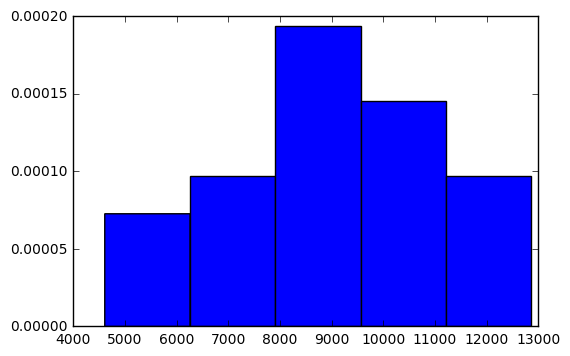

In [46]:
plt.hist(temp_as_b.AS, bins = 5, normed = 1)
plt.show()

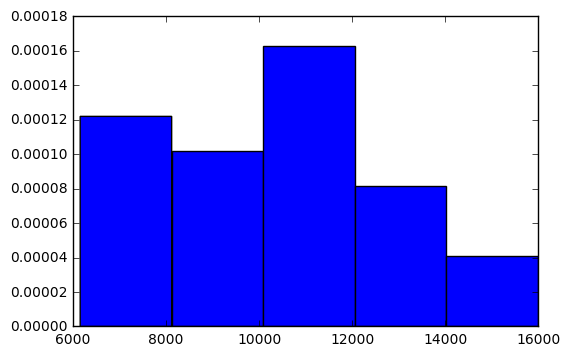

In [44]:
plt.hist(temp_as_c.AS, bins = 5, normed = 1, cumulative = 0)
plt.show()

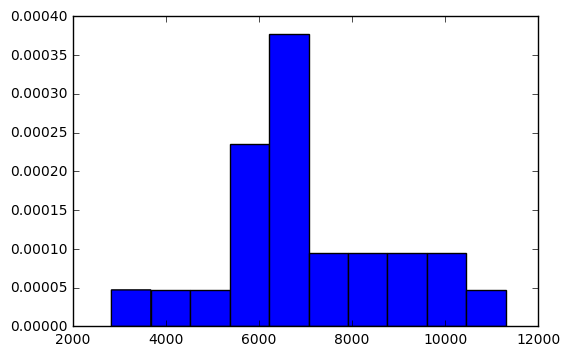

In [38]:
plt.hist(temp_as_a.AS, bins = 10, normed = 1)
plt.show()

In [50]:
temp = df_train[df_train['QR'] == 2][['BL', 'AS']]
temp_as_a_2 = temp[temp['BL'] == 'A']

In [51]:
temp_as_a_2.head()

,BL,AS
3,A,7819.374160
15,A,5724.699754
27,A,11185.388050
39,A,7103.394939
51,A,6398.971667


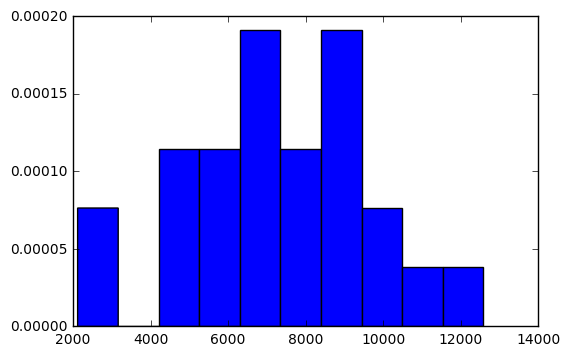

In [52]:
plt.hist(temp_as_a_2.AS, bins = 10, normed = 1)
plt.show()

In [53]:
temp = df_train[df_train['QR'] == 2][['BL', 'AS']]
temp_as_b_2 = temp[temp['BL'] == 'B']

In [54]:
temp_as_b_2.head()

,BL,AS
4,B,8163.361092
16,B,11588.763810
28,B,10870.244260
40,B,11495.292270
52,B,10093.303080


In [57]:
temp_as_b_2.BL.value_counts()

B    25
Name: BL, dtype: int64

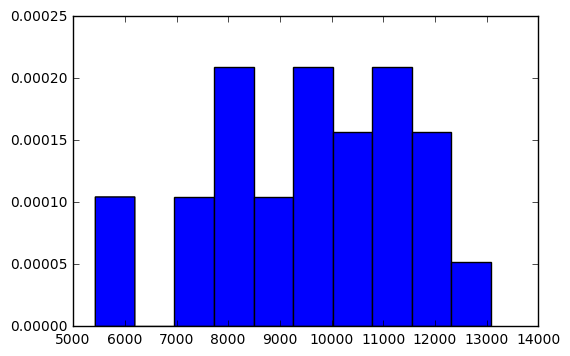

In [55]:
plt.hist(temp_as_b_2.AS, bins = 10, normed = 1)
plt.show()

In [58]:
temp = df_train[df_train['QR'] == 1][['BL', 'DW']]
temp_dw_a_1 = temp[temp['BL'] == 'A']

In [60]:
temp_dw_a_1.head()

,BL,DW
0,A,7762.204749
12,A,7319.831054
24,A,4777.830161
36,A,10067.120080
48,A,10893.203920


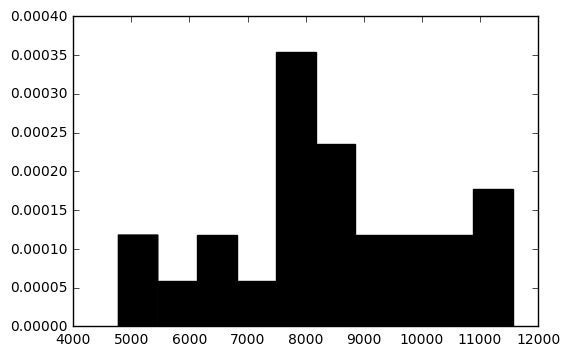

In [63]:
plt.hist(temp_dw_a_1.DW, bins = 10, normed = 1, color = 'black')
plt.show()

In [105]:
temp = df_train[df_train['QR'] == 1][['BL', 'DW']]
temp_dw_b_1 = temp[temp['BL'] == 'B']

In [111]:
temp_dw_b_1.DW.iloc[0]

3592.2491219999997

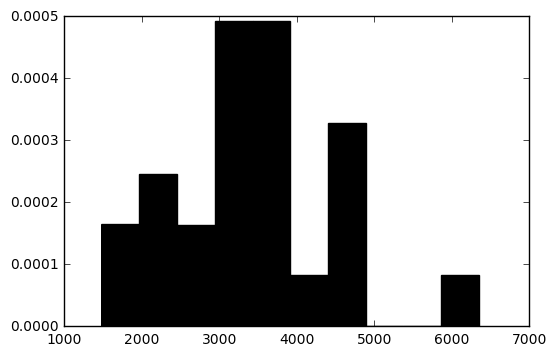

In [112]:
plt.hist(temp_dw_a_1.DW, bins = 10, normed = 1, color = 'black')
plt.show()

In [72]:
temp = df_train[df_train['QR'] == 1][['BL', 'AS', 'DW', 'LL', 'ZY', 'QJ']]
temp_A_1 = temp[temp['BL'] == 'A']

In [82]:
z = []
for i in range(temp_A_1.shape[0]):
    for j in range()
    z.append(temp_A_1.iloc[i,1:])

In [83]:
z

[AS    2822.03
 DW     7762.2
 LL     3669.4
 ZY    2931.09
 QJ    10595.3
 Name: 0, dtype: object, AS    11303.4
 DW    7319.83
 LL    2913.16
 ZY    3285.54
 QJ    8732.34
 Name: 12, dtype: object, AS     9878.8
 DW    4777.83
 LL    3655.13
 ZY    2040.86
 QJ    12501.5
 Name: 24, dtype: object, AS     7054.8
 DW    10067.1
 LL    2216.75
 ZY    2728.84
 QJ    12574.1
 Name: 36, dtype: object, AS    6332.99
 DW    10893.2
 LL    4398.75
 ZY    4422.55
 QJ    7176.34
 Name: 48, dtype: object, AS    6375.64
 DW    7590.01
 LL    2209.53
 ZY    1045.06
 QJ    9245.11
 Name: 60, dtype: object, AS    7088.74
 DW    5761.23
 LL    2201.57
 ZY    2170.18
 QJ    7334.81
 Name: 72, dtype: object, AS    7723.17
 DW    9521.38
 LL     2183.1
 ZY    1897.25
 QJ    7717.39
 Name: 84, dtype: object, AS    5606.81
 DW    5262.28
 LL    725.563
 ZY    2751.62
 QJ    8307.34
 Name: 96, dtype: object, AS    4228.93
 DW    7735.14
 LL    743.639
 ZY     2806.7
 QJ    8383.25
 Name: 108, dtype: object,

In [97]:
temp = df_train[df_train['C3'] == 0][['LL', 'QR']]

In [98]:
temp

,LL,QR
123,5134.427947,2
132,2930.719091,1


In [99]:
df_train.drop([123, 132], inplace = 1)

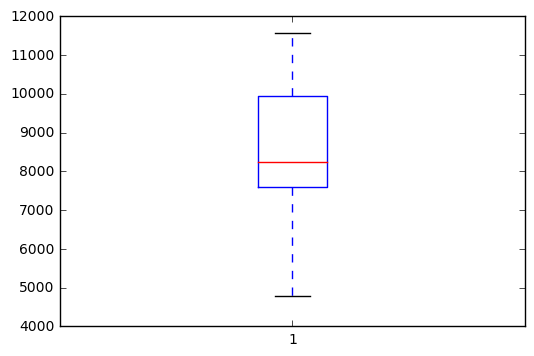

In [116]:
plt.boxplot(temp_dw_a_1.DW)
plt.show()

In [161]:
nw = df_train.filter(['AS'])/df_train.filter(['C1'])

In [ ]:
for i in 

In [162]:
nw

,AS,C1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [174]:
for i in range(11):
    print(rd.sample(range(1,6), 2))

[1, 2]
[4, 5]
[1, 3]
[2, 3]
[5, 4]
[5, 1]
[2, 3]
[3, 5]
[2, 1]
[3, 2]
[5, 1]
